# Analyse de coronavirus

## Objectif : Prédire si une personne est affectéou non, avec 90% d'exactitude

In [2]:
#importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from mpmath.libmp import normalize

In [3]:
pd.set_option('display.max_row', 111)
pd.set_option('display.column', 111)

In [4]:
data = pd.read_excel('dataset.xlsx')

In [5]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

## Hecklist de base
### Analyse de forme
   #### Variable target : SARS-Cov-2 exam result
   #### Ligne et colonne  : 5644, 111
   #### Type de variable :
   #### Analyse de valeur manquante : beaucoup de NaN (Moitié de variable)
### Analyse de fond
### Visualisation de target : 10% positif
### Signification des variables:
#### - Variable continue standartisée
#### - Age quantile
#### - Variable quantitative binéaires (0,1), rhinovirus elevée
### Relation entre Target et Variable :

In [6]:
df = data.copy()

In [7]:
df.shape

(5644, 111)

In [8]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

<AxesSubplot:ylabel='None'>

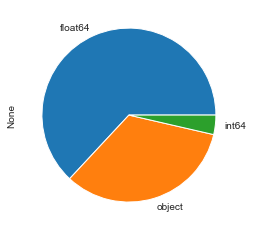

In [9]:
df.dtypes.value_counts().plot.pie()

### Elimination de NaN

<AxesSubplot:>

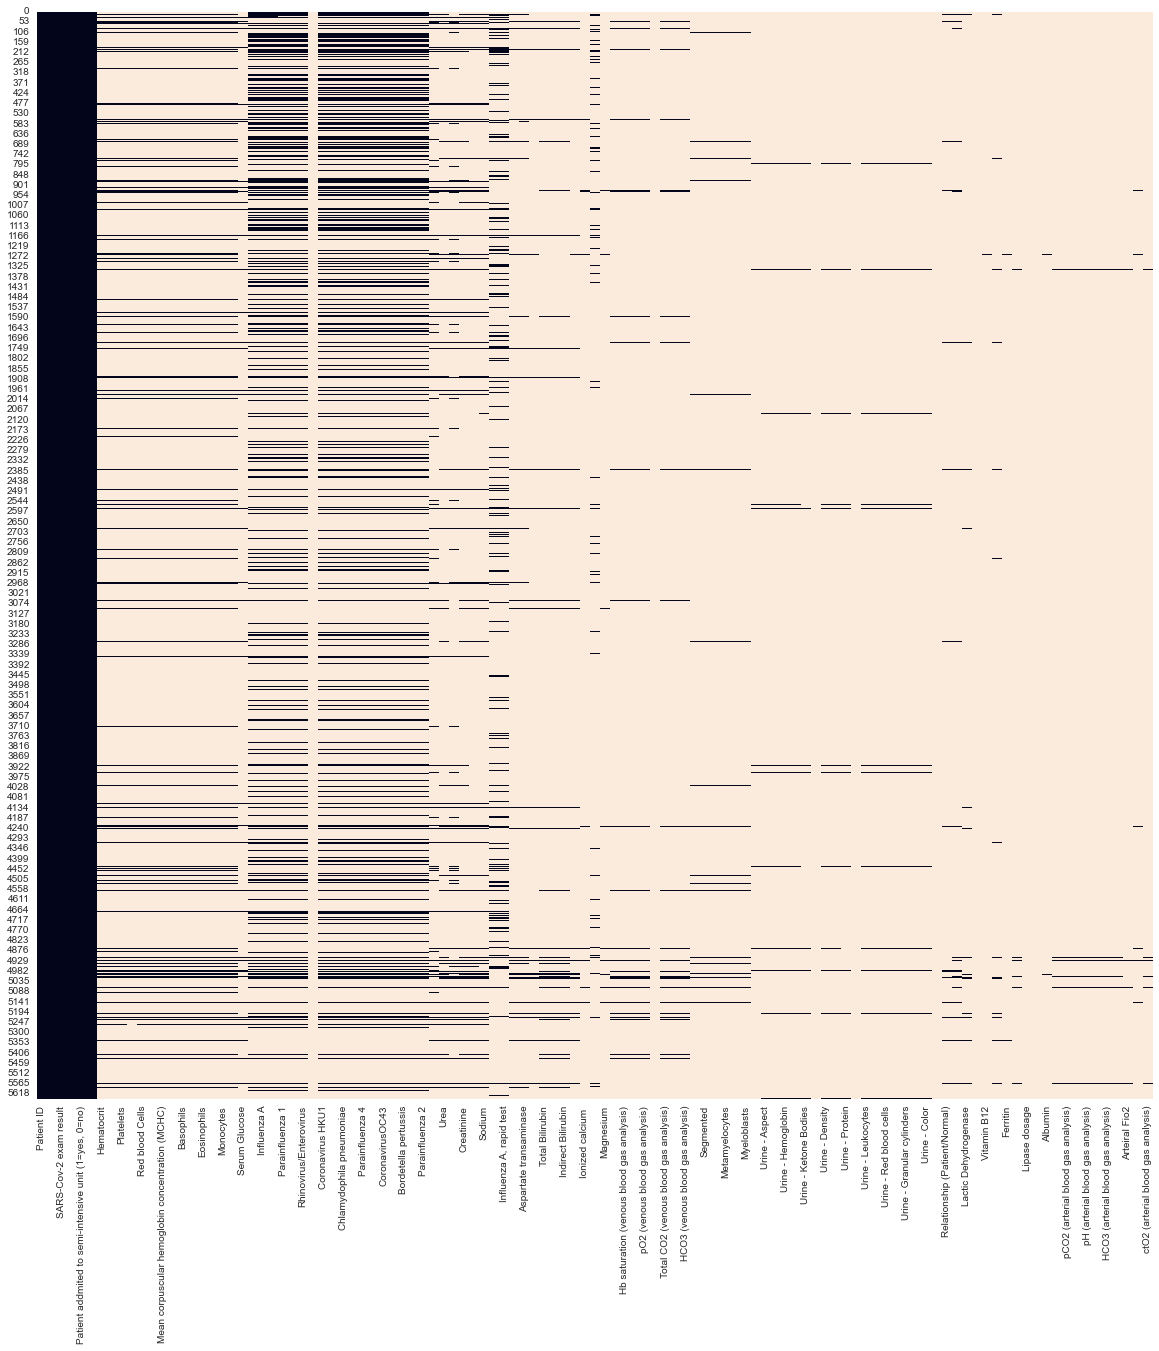

In [10]:
plt.figure(figsize=(20, 20))
sb.heatmap(df.isna(), cbar=False)

In [11]:
(df.isna().sum() / df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

# Analyse de fond
## Eliminer le colonne unitile

In [12]:
df[df.columns[df.isna().sum() / df.shape[0] < 0.9]]

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   ...    Adenovirus  \
0            NaN        NaN                    NaN  ...           NaN   
1      -0.022340  -0.517413               0.010677  ...  not_detected   
2            NaN        NaN                    NaN  ...           NaN   
3            NaN        NaN                    NaN  ...           NaN   
4            NaN        NaN                    NaN  ...  not_detected   
...          ...        ...                    ...  ...           ...   
5639         NaN        NaN                    NaN  ...           NaN   
5640         NaN        NaN                    NaN  ...           NaN   
5641         NaN        NaN                    NaN  ...           NaN   
5642         NaN        NaN                    NaN  ...           NaN   
5643    0.541564  -0.906829         

<AxesSubplot:>

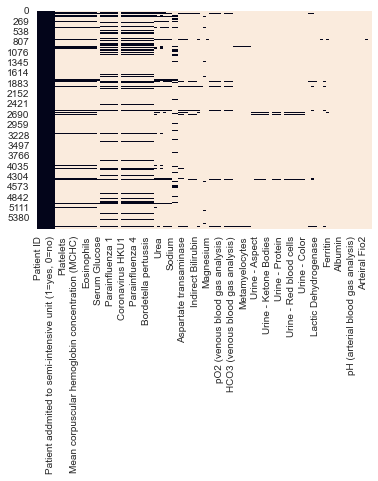

In [13]:
sb.heatmap(df.isna(), cbar=False)

### Elimination de patientID

In [14]:
df = df.drop("Patient ID", axis=1)

#### Visualisation de Target

In [15]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

### Histogrammes des variables continues

C:\Users\rjja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rjja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rjja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

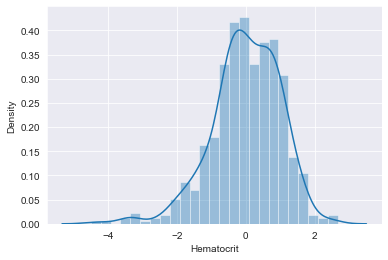

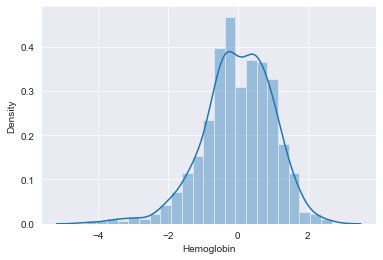

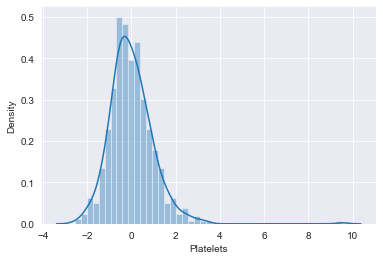

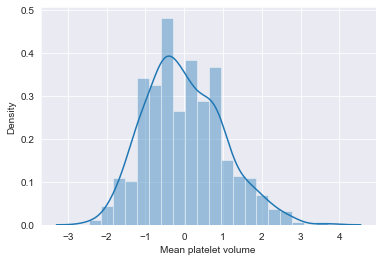

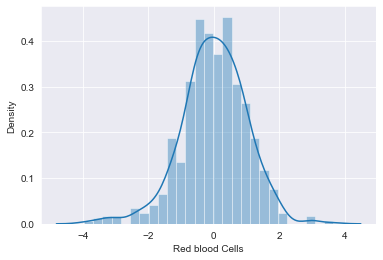

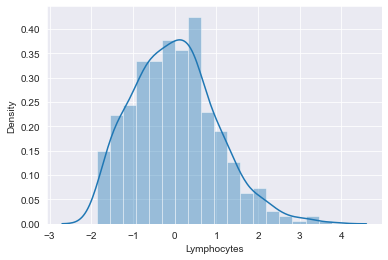

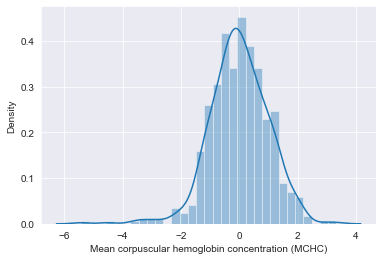

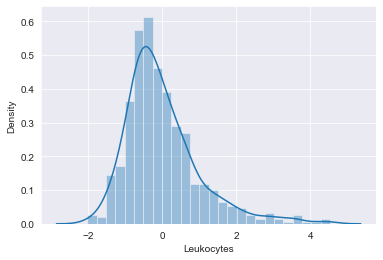

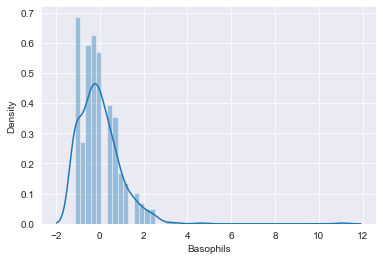

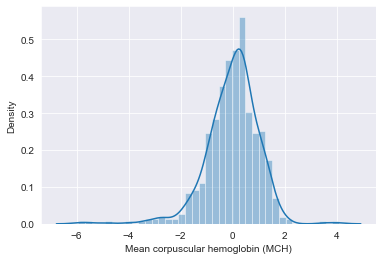

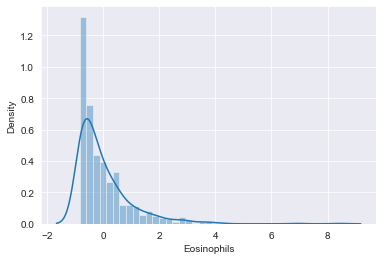

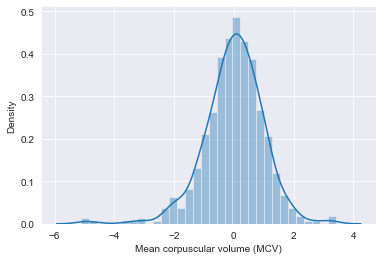

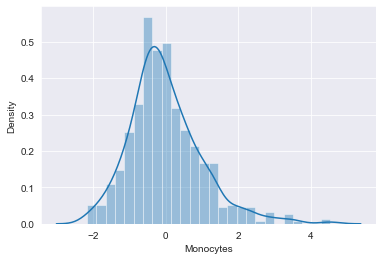

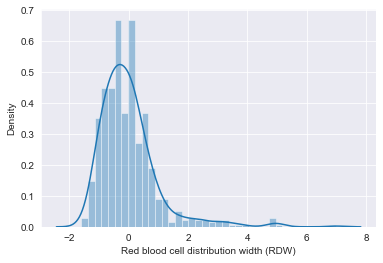

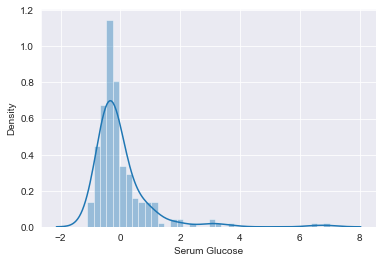

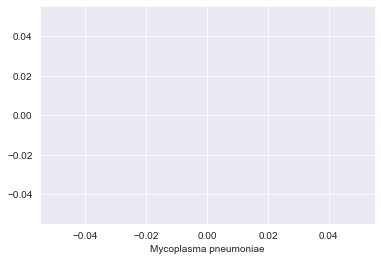

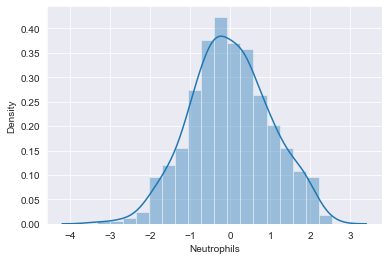

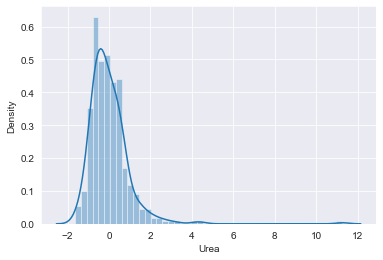

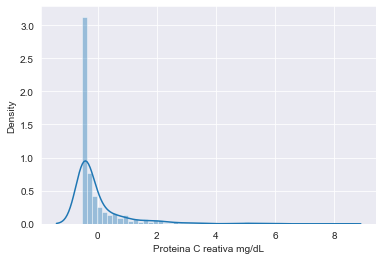

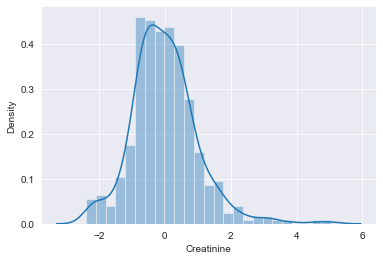

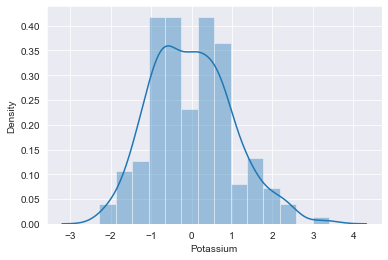

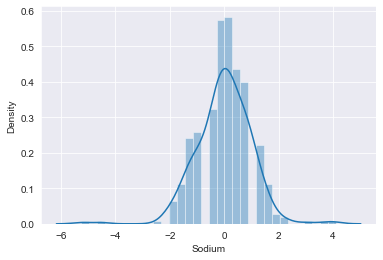

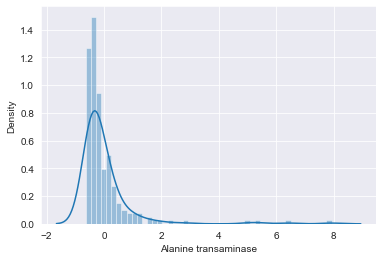

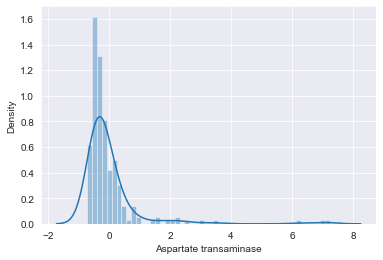

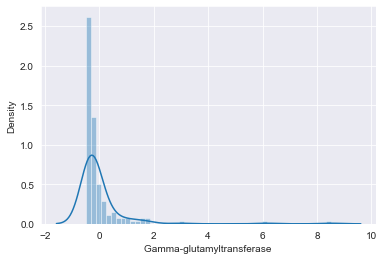

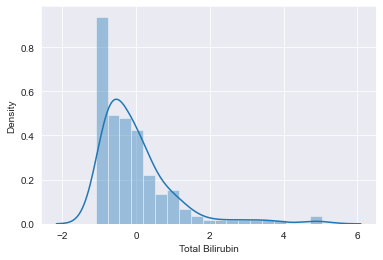

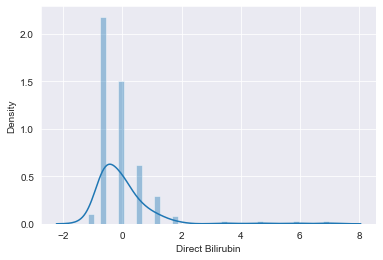

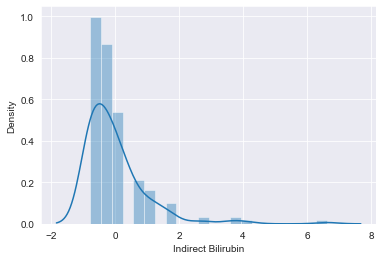

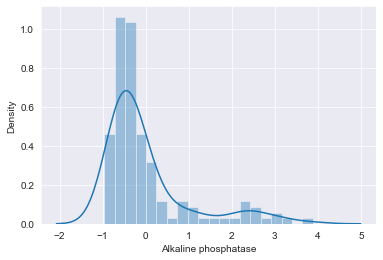

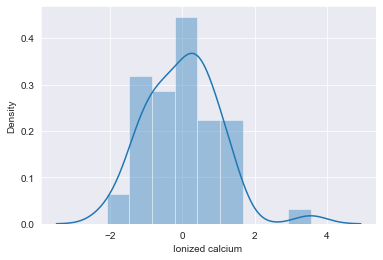

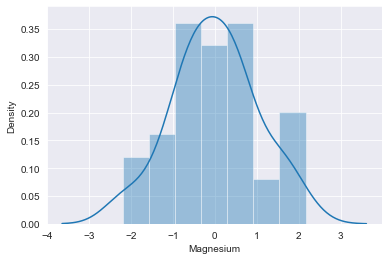

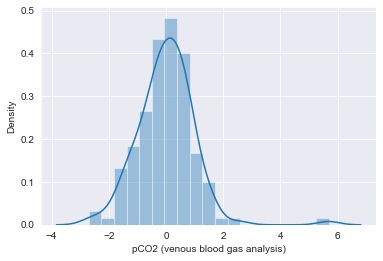

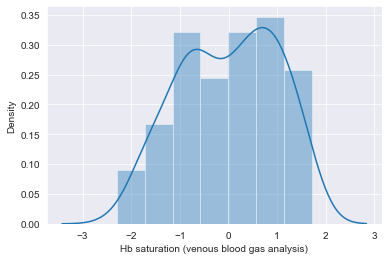

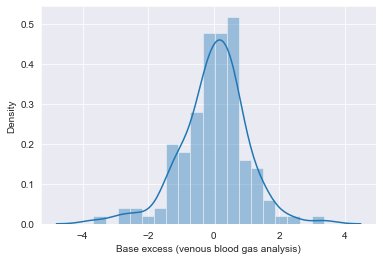

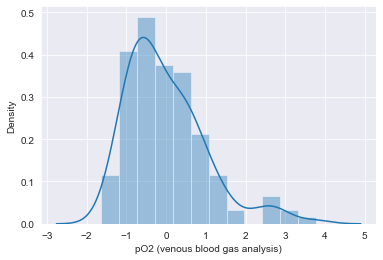

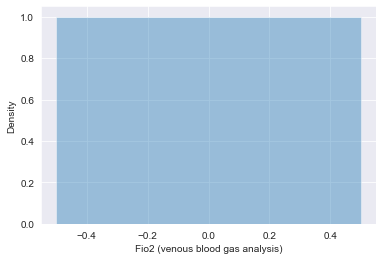

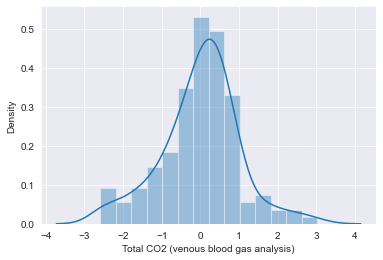

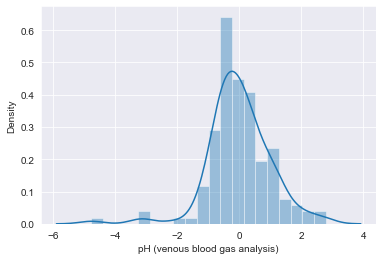

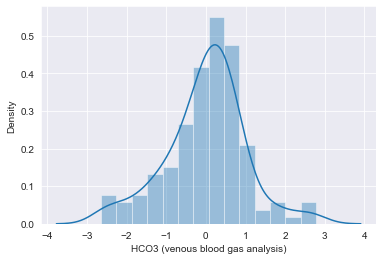

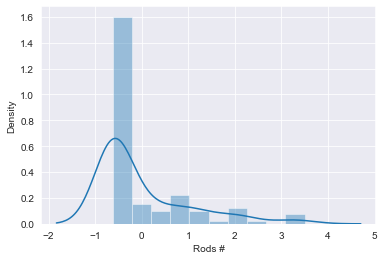

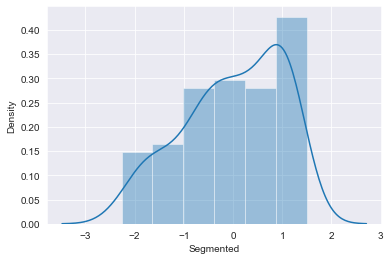

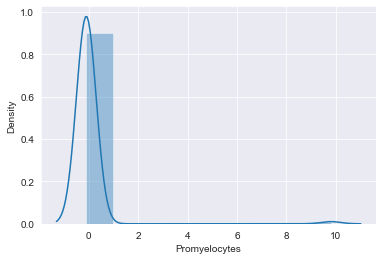

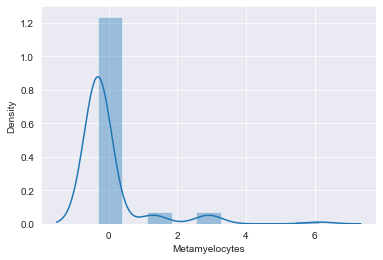

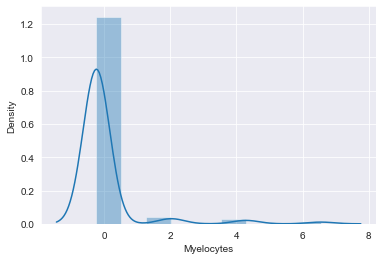

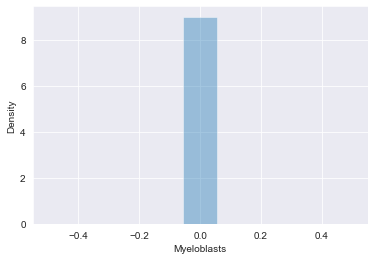

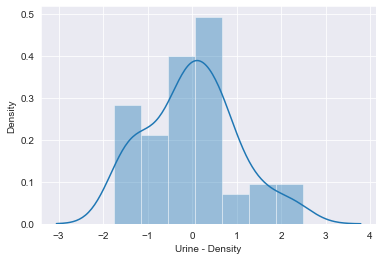

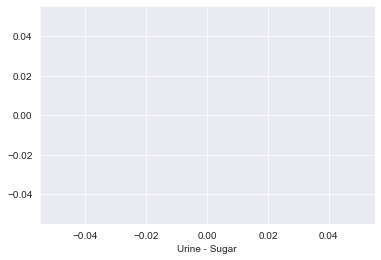

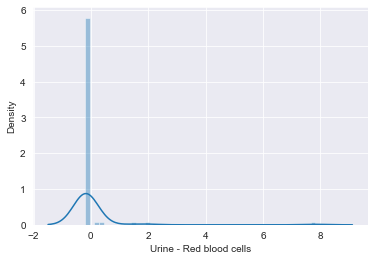

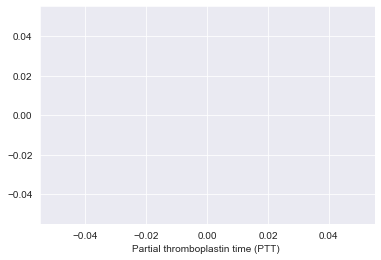

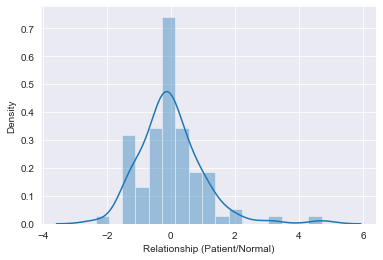

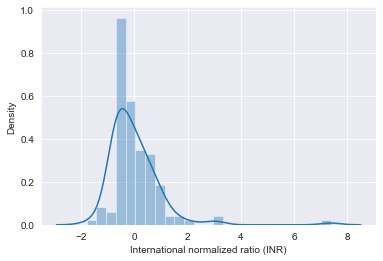

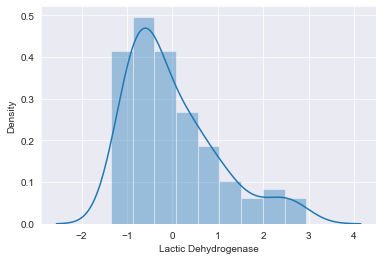

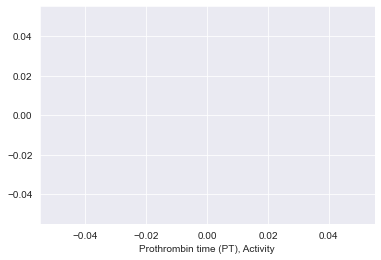

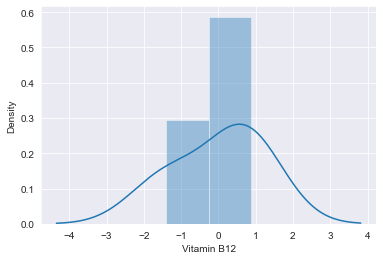

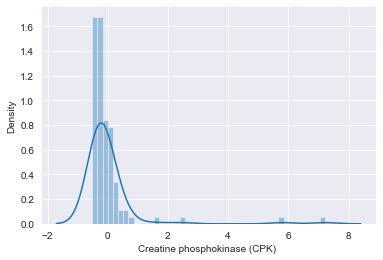

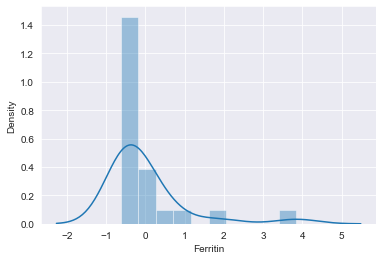

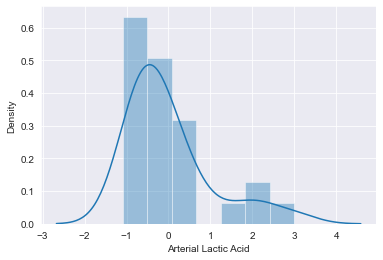

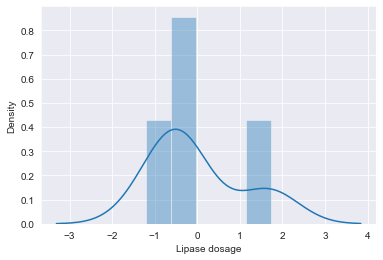

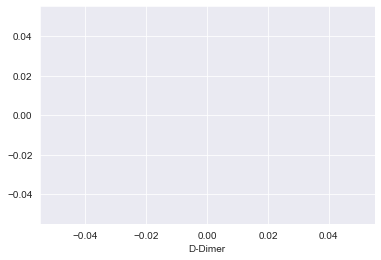

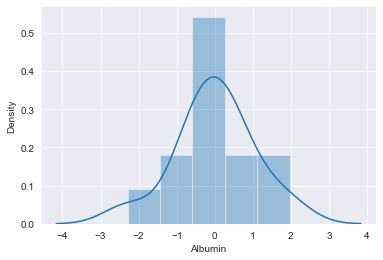

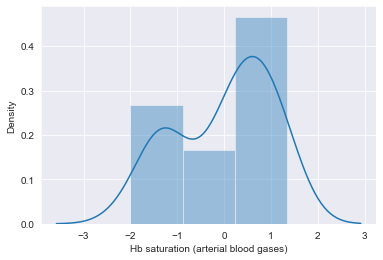

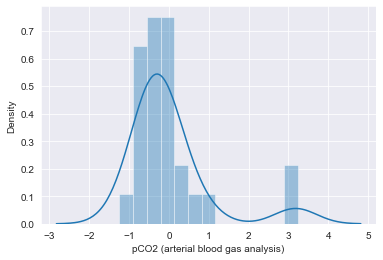

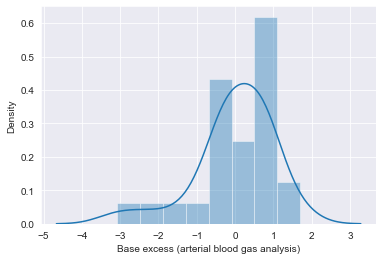

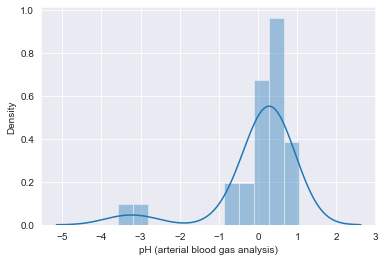

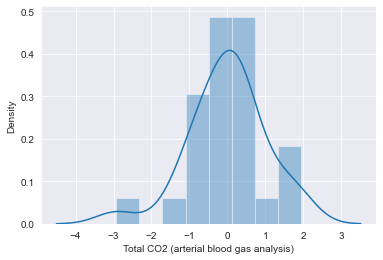

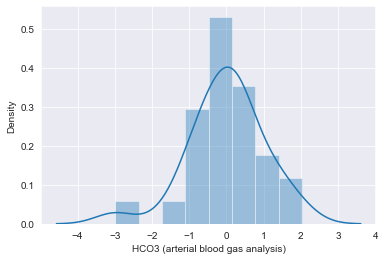

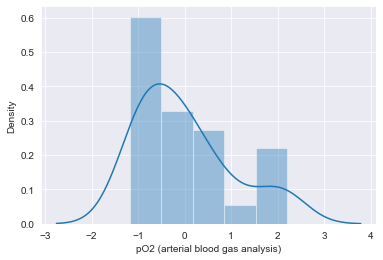

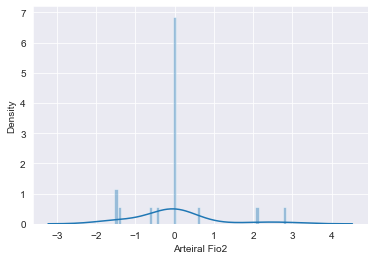

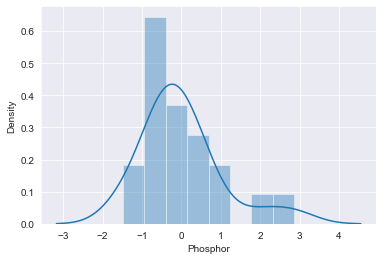

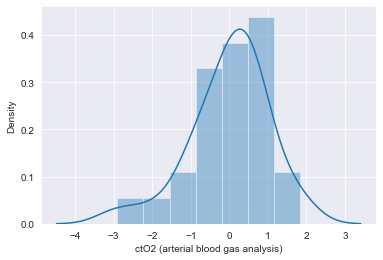

In [16]:
for col in df.select_dtypes("float"):
    plt.figure()
    sb.distplot(df[col])

#### ==> Variable standartisée

C:\Users\rjja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

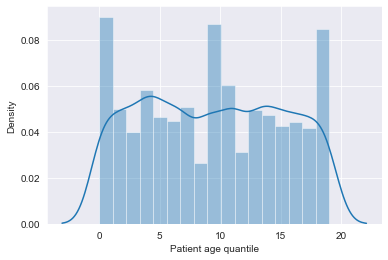

In [98]:
sb.distplot(df['Patient age quantile'])

In [17]:
df['Patient age quantile'].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

#### Difficille de tratoter et interpreter

## Variables quantitative

In [18]:
df["SARS-Cov-2 exam result"].unique()

array(['negative', 'positive'], dtype=object)

In [19]:
for col in df.select_dtypes('object'):
    print(f'{col:-<60} {df[col].unique()}')

SARS-Cov-2 exam result-------------------------------------- ['negative' 'positive']
Respiratory Syncytial Virus--------------------------------- [nan 'not_detected' 'detected']
Influenza A------------------------------------------------- [nan 'not_detected' 'detected']
Influenza B------------------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1--------------------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63--------------------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus-------------------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1-------------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3--------------------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae------------------------------------ [nan 'not_detected' 'detected']
Adenovirus-------------------------------------------------- [nan 'not_detecte

C:\Users\rjja\AppData\Local\Temp\ipykernel_11536\2319614356.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


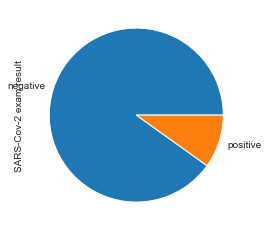

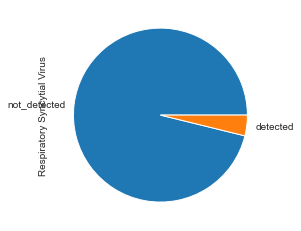

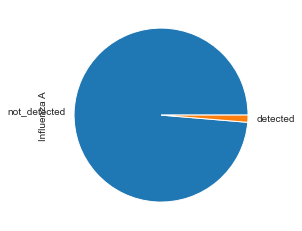

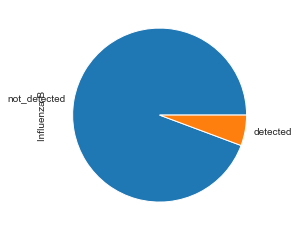

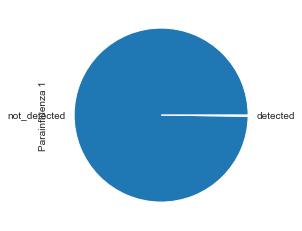

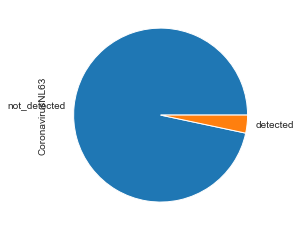

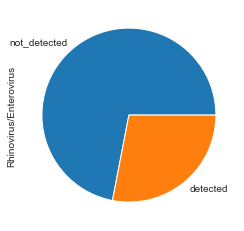

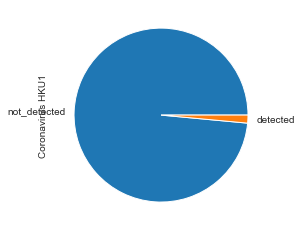

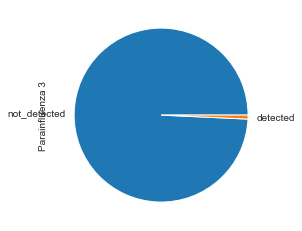

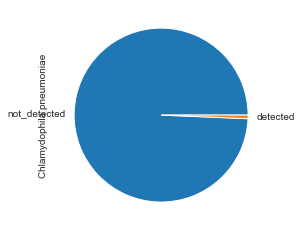

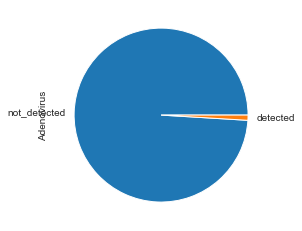

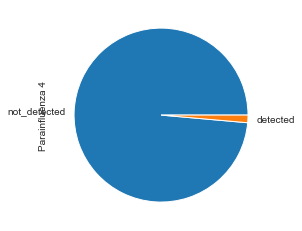

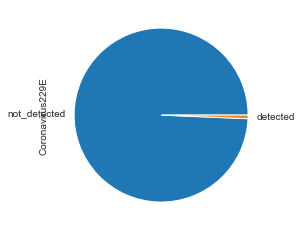

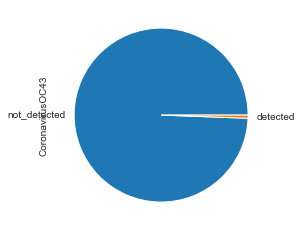

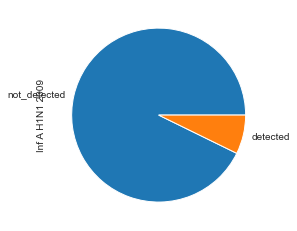

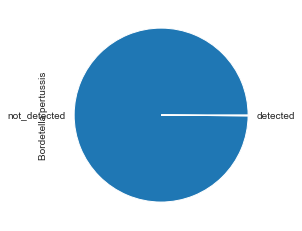

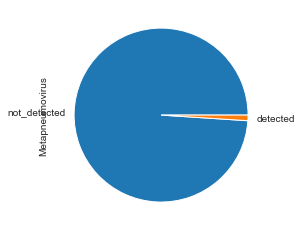

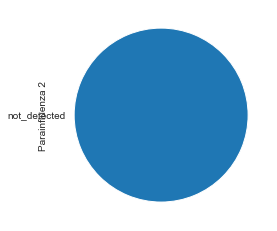

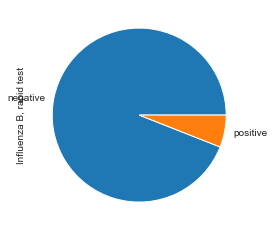

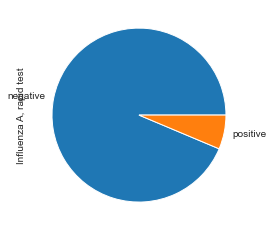

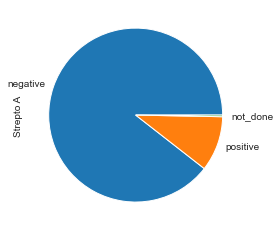

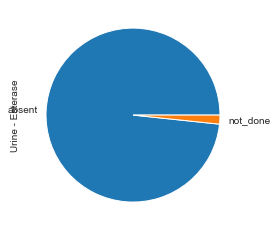

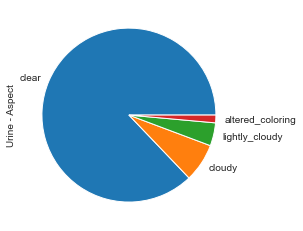

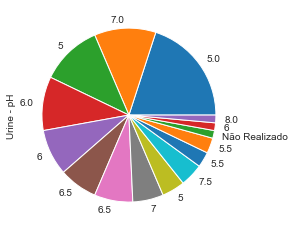

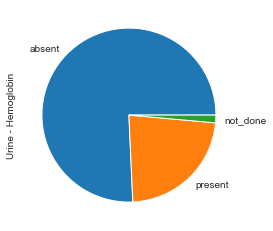

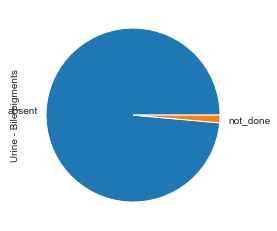

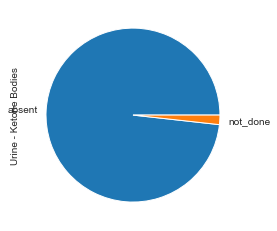

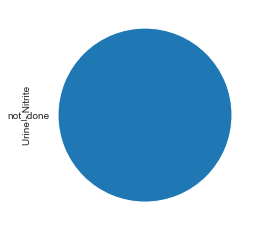

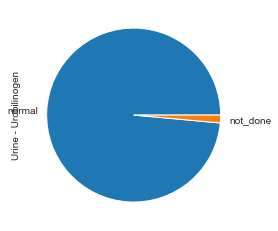

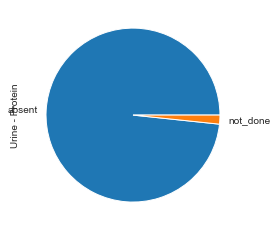

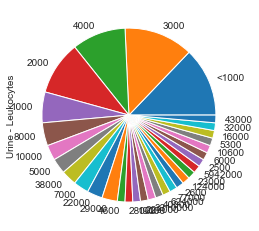

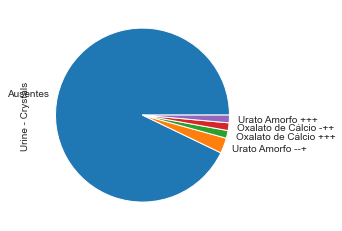

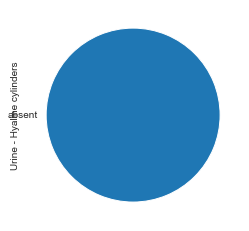

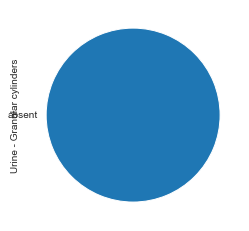

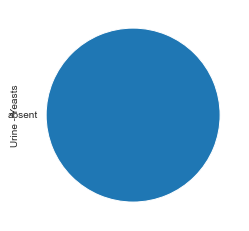

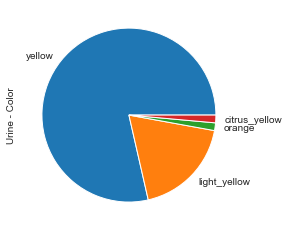

In [20]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

# Visualiser la relation entre variable et target

In [21]:
positive_df = df[df["SARS-Cov-2 exam result"] == 'positive']

In [22]:
negative_df = df[df["SARS-Cov-2 exam result"] == 'negative']

#### Création des ensemble Blood et Viral

In [23]:
missing_rate = df.isna().sum() / df.shape[0]

In [24]:
blood_column = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]

In [25]:
viral_column = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

## Visualiser la relation target et blood

C:\Users\rjja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rjja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rjja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

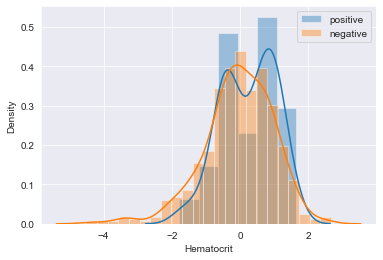

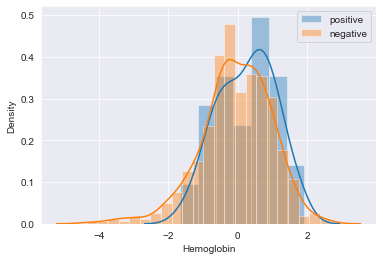

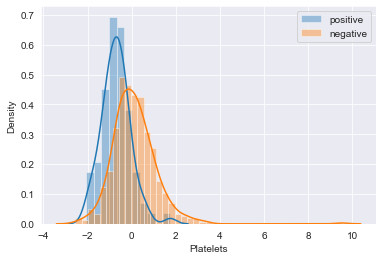

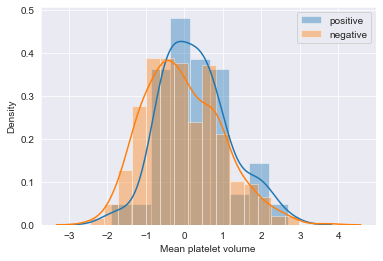

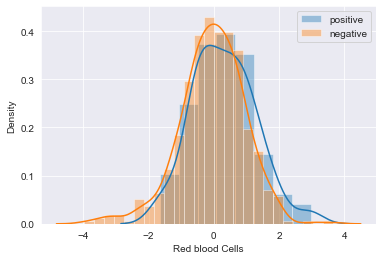

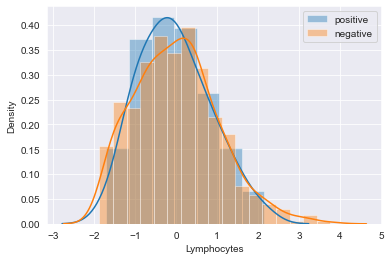

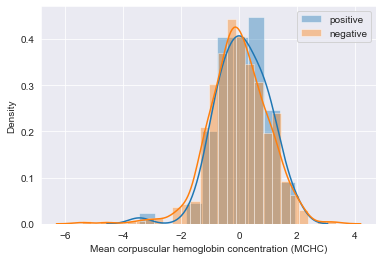

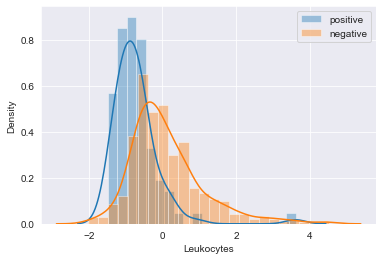

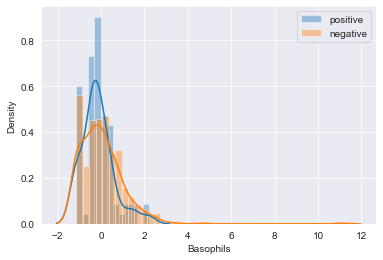

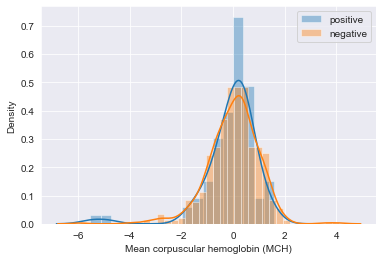

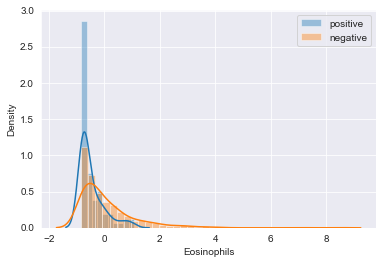

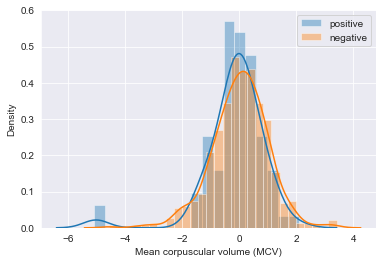

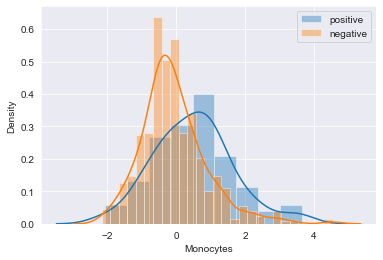

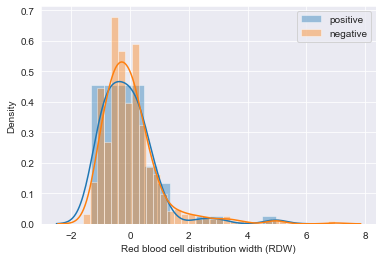

In [26]:
for col in blood_column:
    plt.figure()
    sb.distplot(positive_df[col], label='positive')
    sb.distplot(negative_df[col], label='negative')
    plt.legend()

### Conclusion : Le taux de Monocytes, Platlets, Leucocytes semblent liée au covid -19

## Relation entre target et Age

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

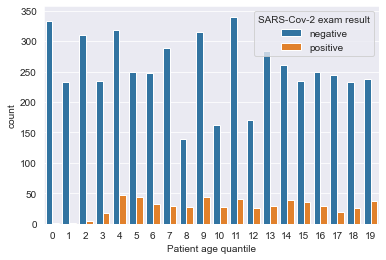

In [116]:
sb.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

### Relation Target / Viral

In [27]:
pd.crosstab(df["SARS-Cov-2 exam result"], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

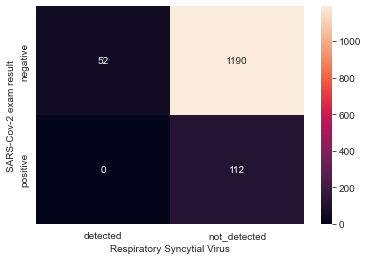

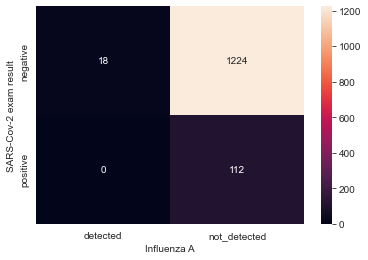

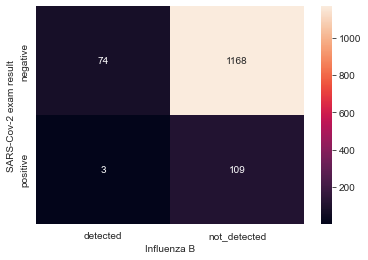

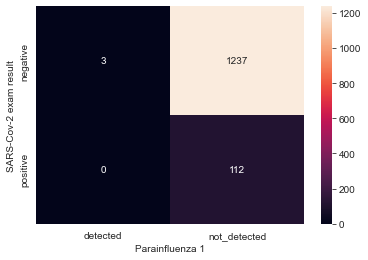

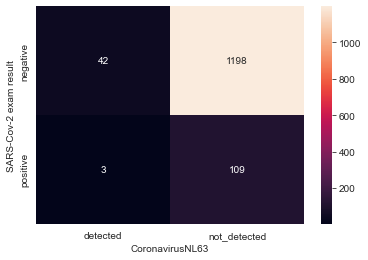

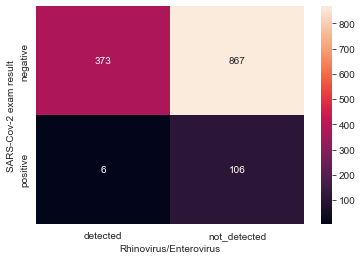

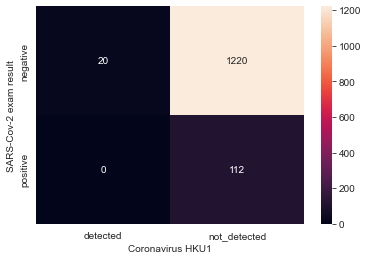

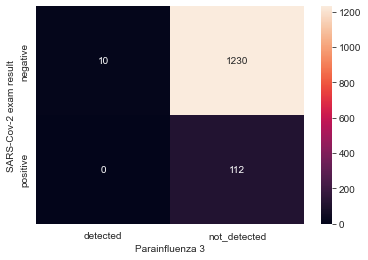

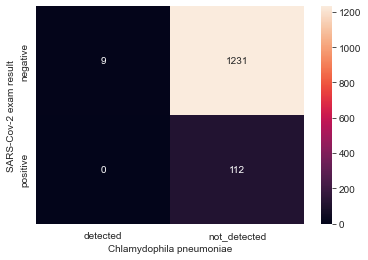

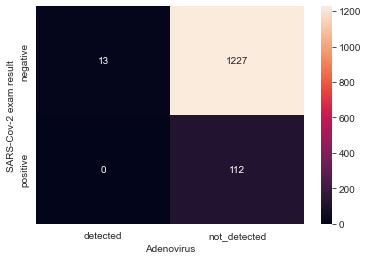

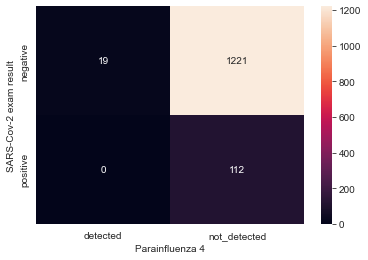

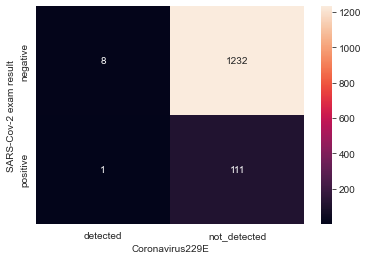

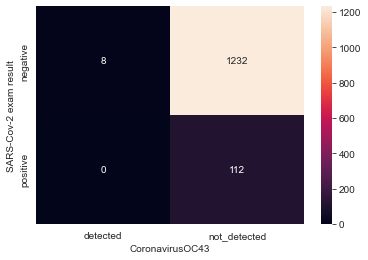

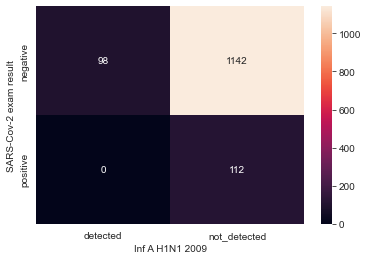

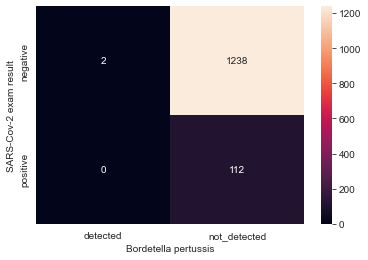

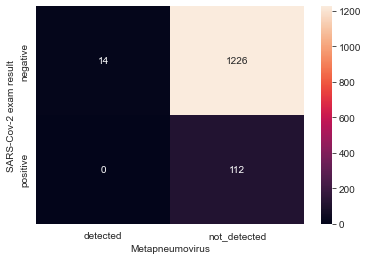

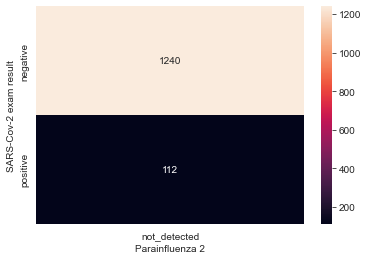

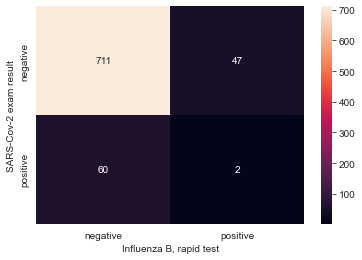

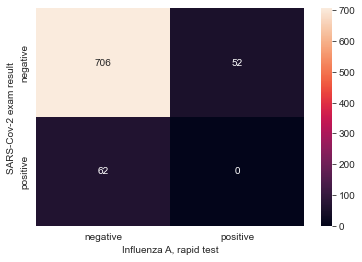

In [28]:
for col in viral_column:
    plt.figure()
    sb.heatmap(pd.crosstab(df["SARS-Cov-2 exam result"], df[col]), annot=True, fmt='d')

#### Conclusion = double maladies sont très rares. Rhinovirus/Enterovirus ^posivif

# Analyse plus détaillé = Variablle / Variable

### Relation blood data /Blood data

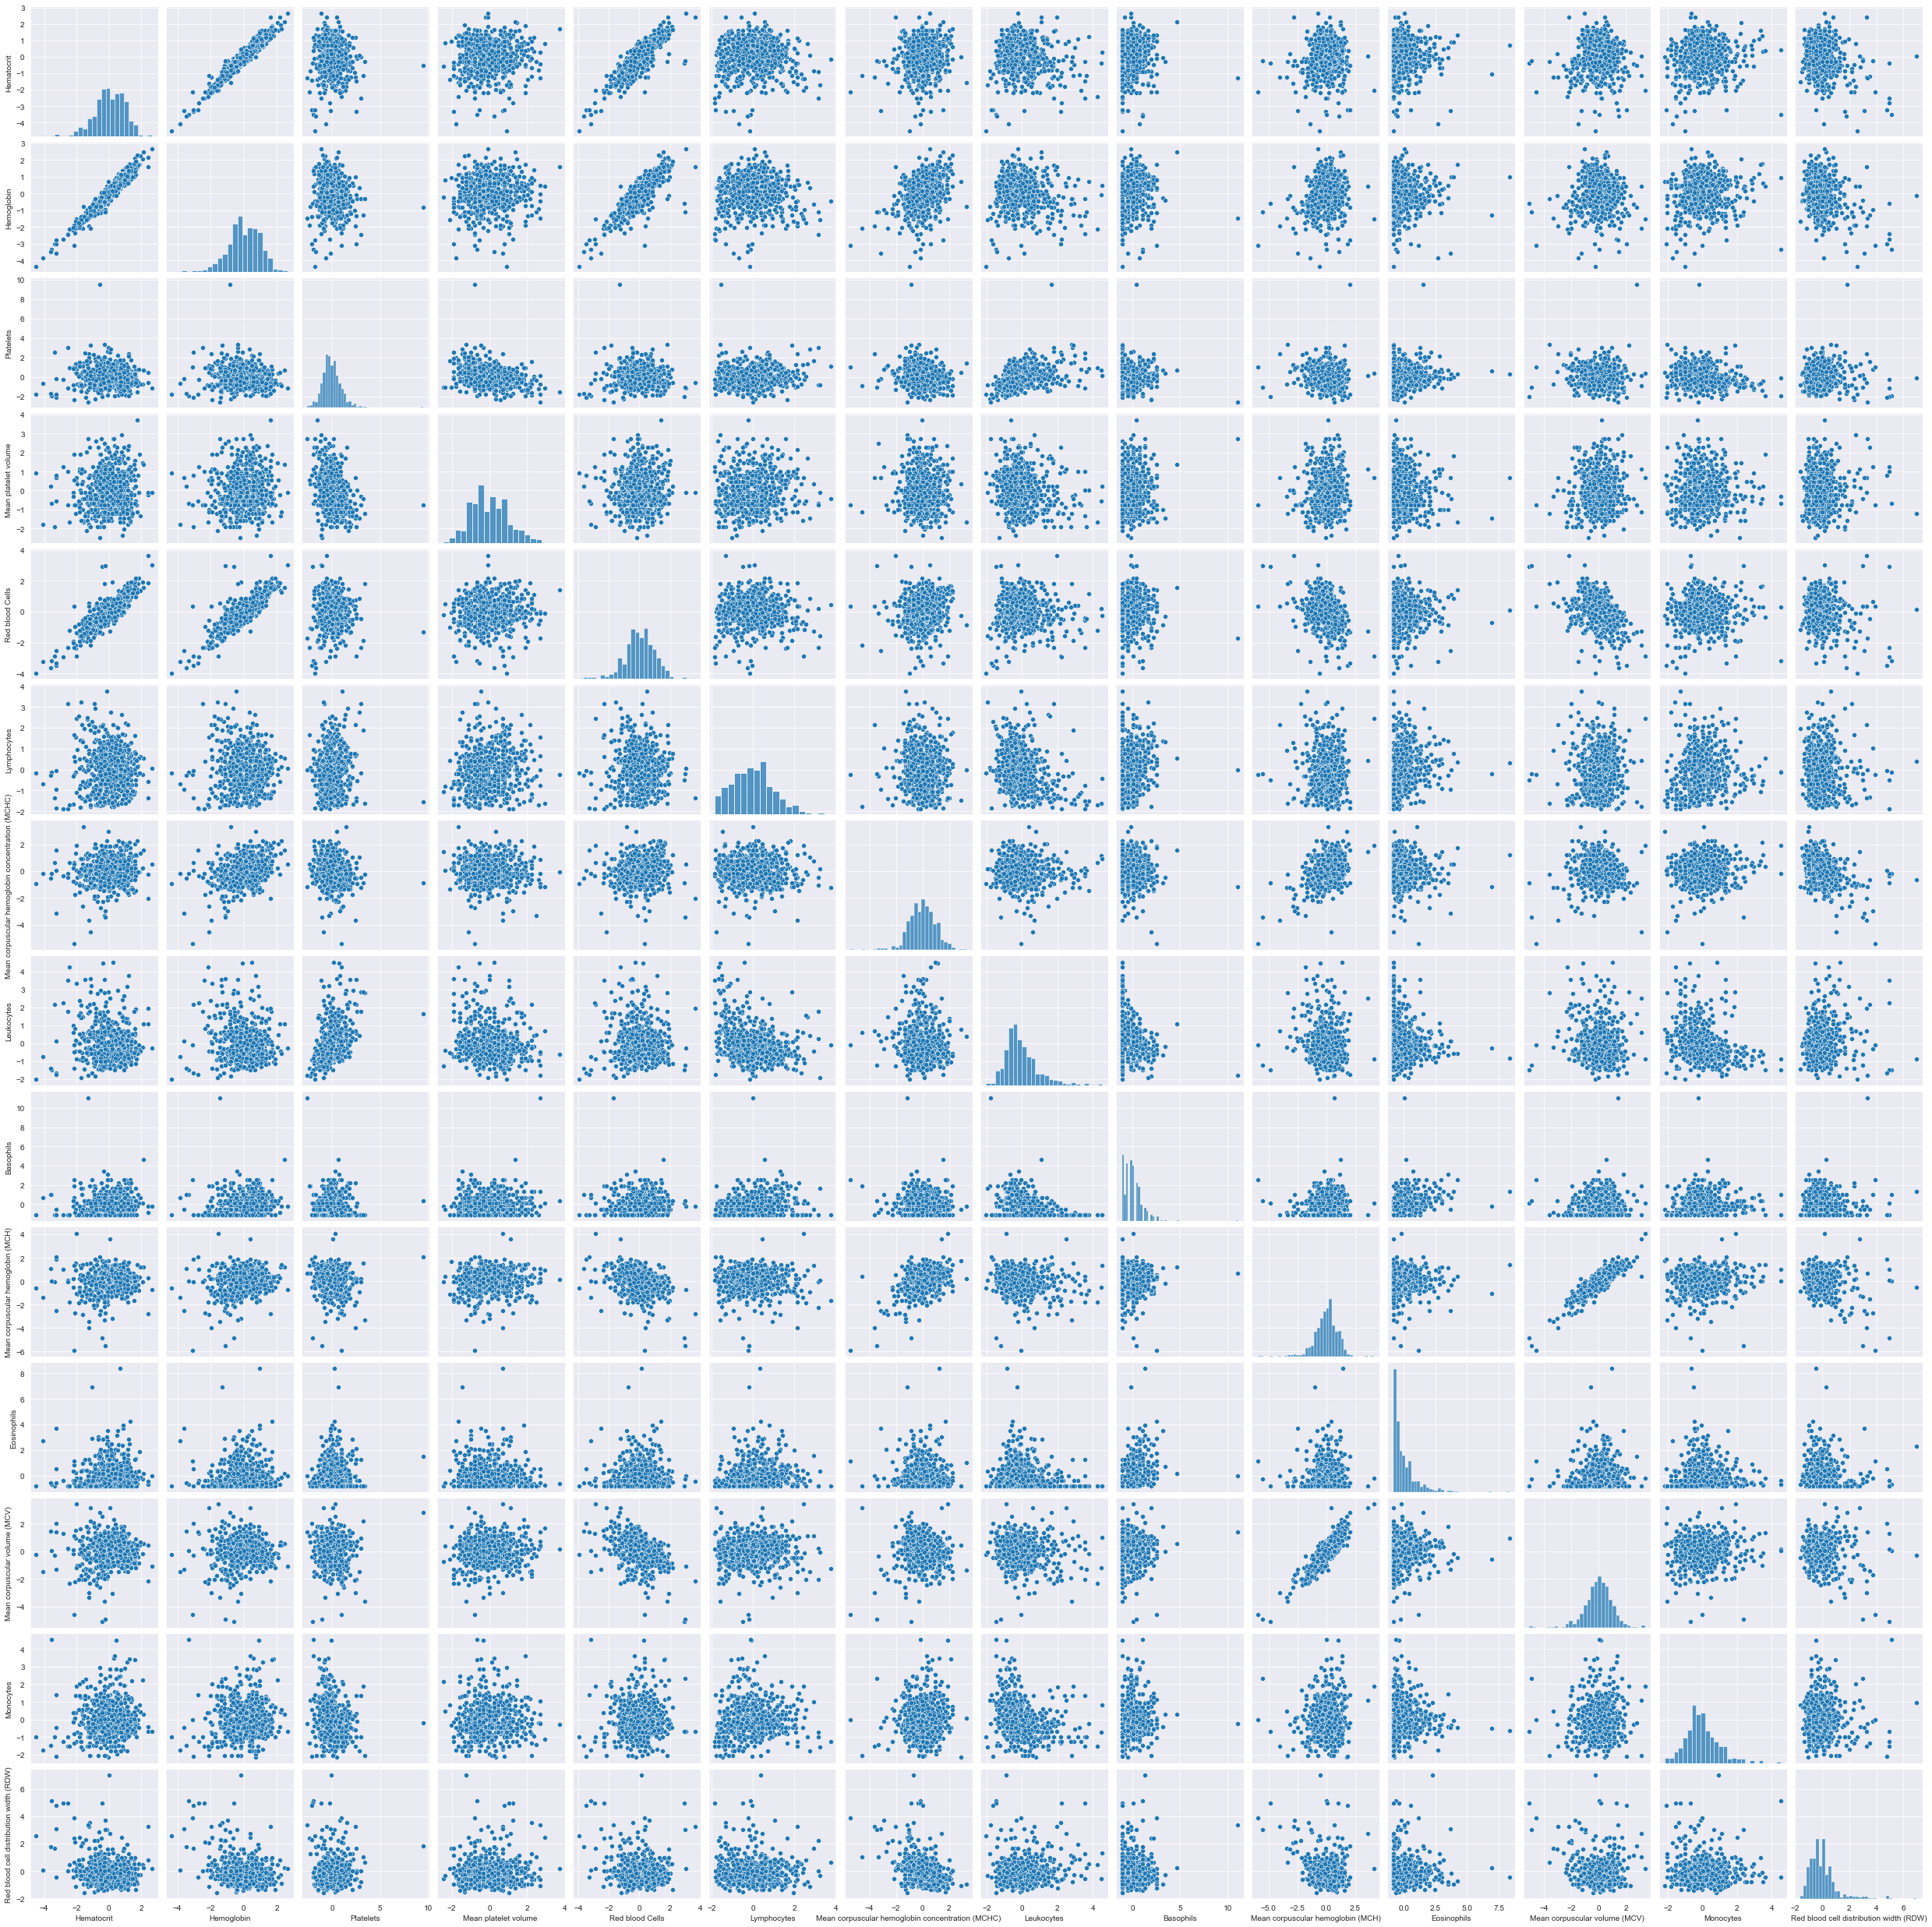

In [29]:
sb.pairplot(df[blood_column])

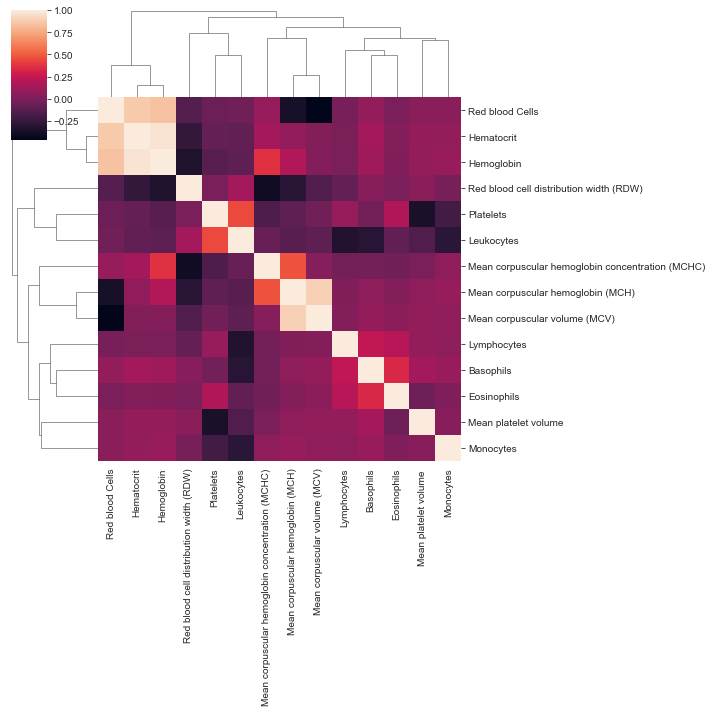

In [30]:
sb.clustermap(df[blood_column].corr())

### certains variable sont très corrélées : +0.9

## Relation Age / Blood

C:\Users\rjja\AppData\Local\Temp\ipykernel_11536\3451302381.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

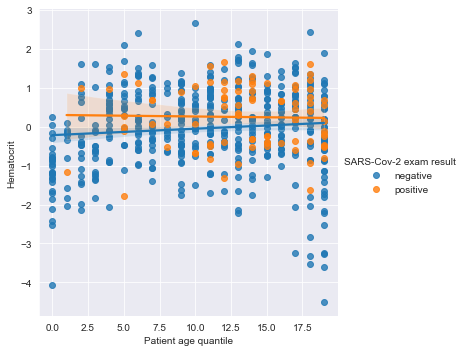

<Figure size 432x288 with 0 Axes>

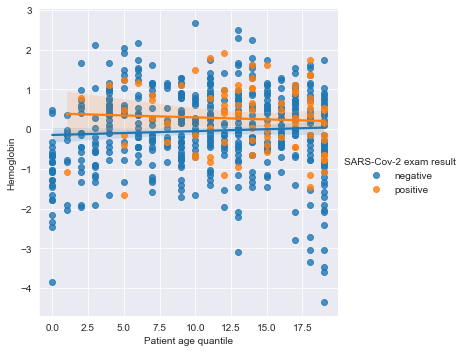

<Figure size 432x288 with 0 Axes>

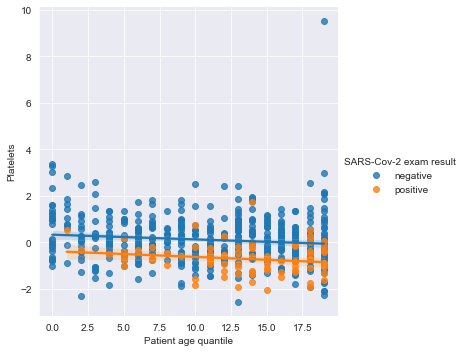

<Figure size 432x288 with 0 Axes>

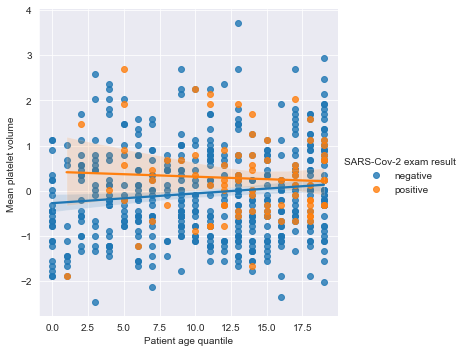

<Figure size 432x288 with 0 Axes>

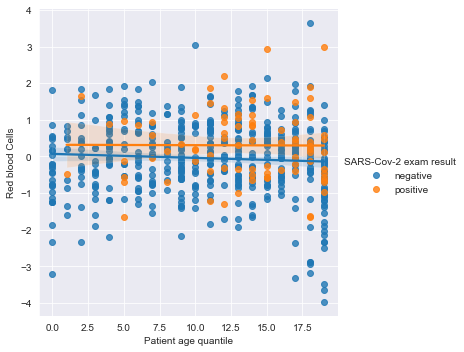

<Figure size 432x288 with 0 Axes>

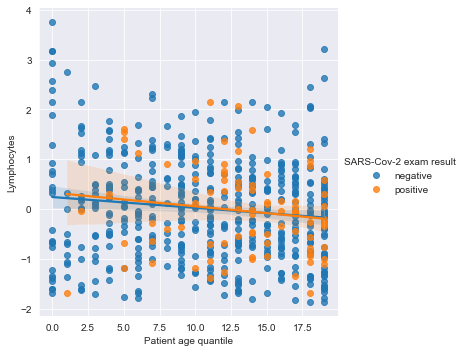

<Figure size 432x288 with 0 Axes>

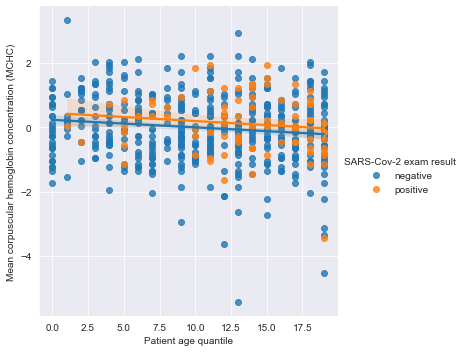

<Figure size 432x288 with 0 Axes>

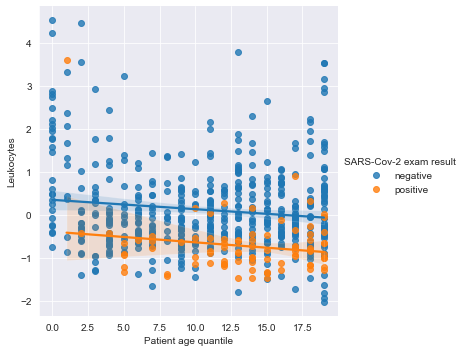

<Figure size 432x288 with 0 Axes>

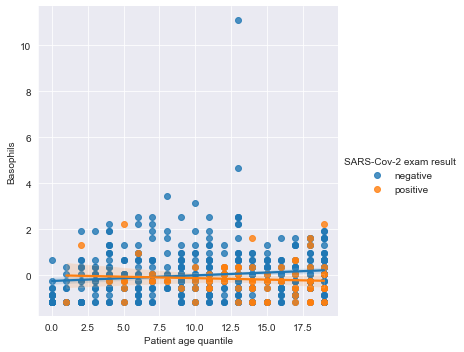

<Figure size 432x288 with 0 Axes>

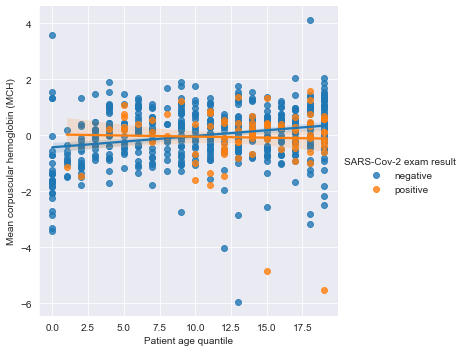

<Figure size 432x288 with 0 Axes>

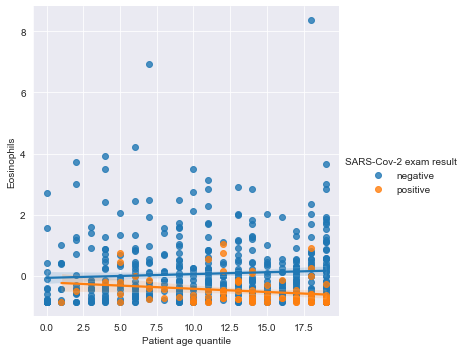

<Figure size 432x288 with 0 Axes>

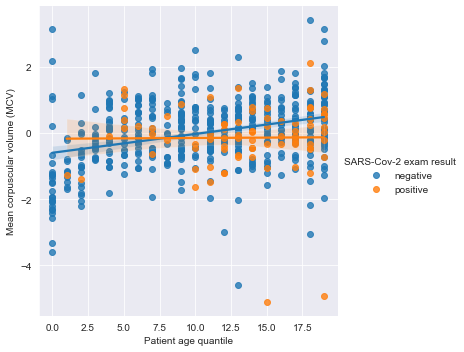

<Figure size 432x288 with 0 Axes>

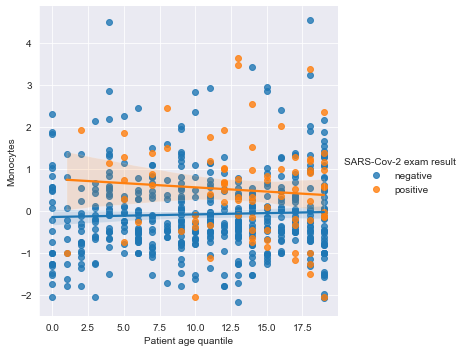

<Figure size 432x288 with 0 Axes>

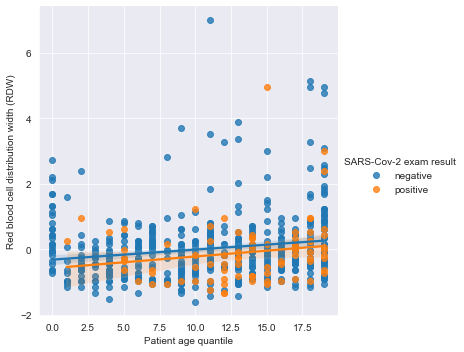

In [31]:
for col in blood_column:
    plt.figure()
    sb.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)

In [32]:
df.corr()['Patient age quantile'].sort_values()

Phosphor                                                -0.511705
Alkaline phosphatase                                    -0.480906
pCO2 (arterial blood gas analysis)                      -0.469049
Lipase dosage                                           -0.357362
Arteiral Fio2                                           -0.334562
Ionized calcium                                         -0.309841
Hb saturation (arterial blood gases)                    -0.223949
Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lactic Dehydrogenase                                    -0.149753
Albumin                                                 -0.137290
Magnesium                                               -0.127646
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Relationship (Patient/Normal)                           -0.122878
Urine - De

### Conclusion : Faible correlation entre age et blood

## Relation Influenza et rapid test

In [33]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])


Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [34]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

### => Influenza rapid test donne de mauvaise résultat

## Relation entre Viral / Blood/

In [35]:
np.sum(df[viral_column[:-2]] == 'detected', axis=1) >= 1

0       False
1        True
2       False
3       False
4        True
        ...  
5639    False
5640    False
5641    False
5642    False
5643    False
Length: 5644, dtype: bool

<AxesSubplot:>

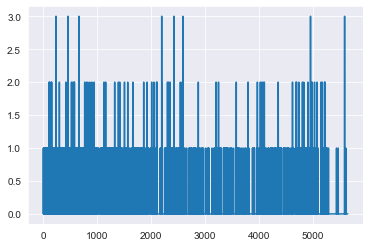

In [36]:
np.sum(df[viral_column[:-2]] == 'detected', axis=1).plot()

In [37]:
df['est malade'] = np.sum(df[viral_column[:-2]] == 'detected', axis=1) >= 1

In [38]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   pCO2 (arterial blood gas analysis)  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  est malade  
0            NaN       NaN                                 NaN       False  
1            NaN       NaN                                 NaN        True  
2            NaN       NaN                                 NaN       False  
3            NaN       NaN                                 NaN       False  
4            NaN       NaN                                 NaN        True  

[5 rows x 111 columns]

In [39]:
malade_df = df[df['est malade'] == True]
non_malade_df = df[df['est malade'] == False]

C:\Users\rjja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rjja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rjja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

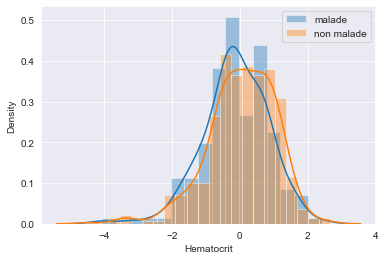

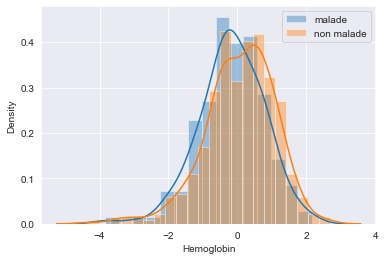

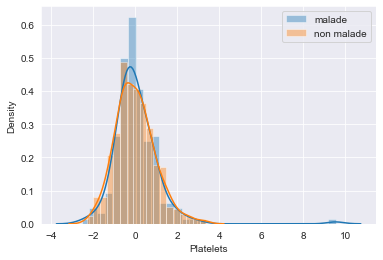

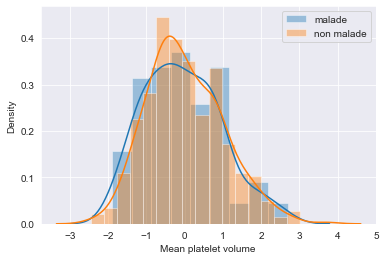

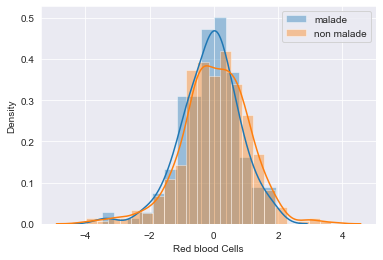

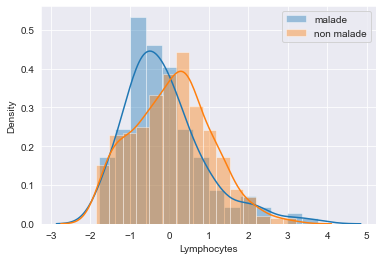

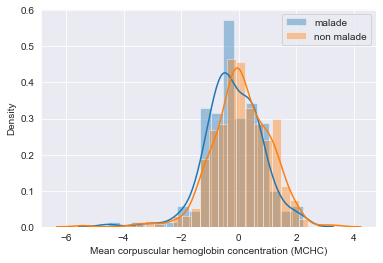

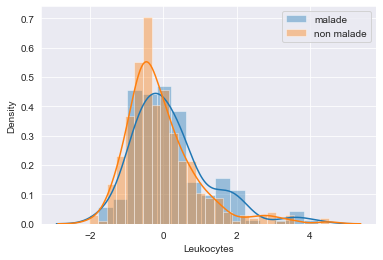

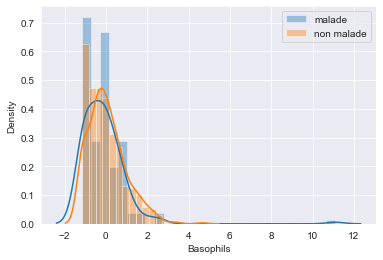

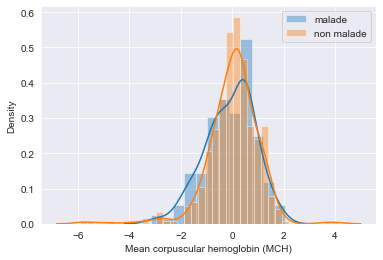

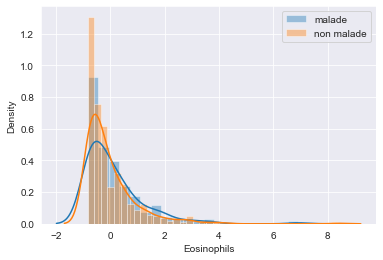

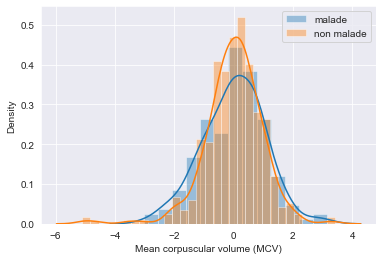

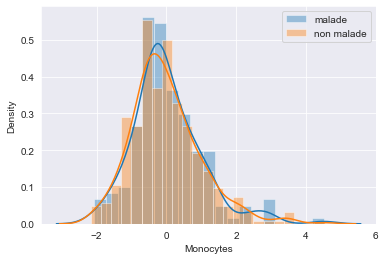

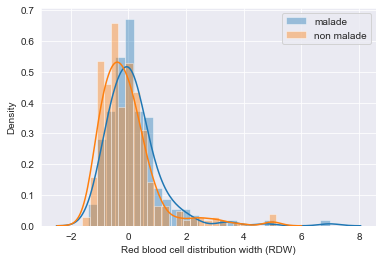

In [40]:
for col in blood_column:
    plt.figure()
    sb.distplot(malade_df[col], label='malade')
    sb.distplot(non_malade_df[col], label='non malade')
    plt.legend()


## =>>Taux sanguin etre malade et non sont différent

In [41]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    if df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins semi-intensives'
    if df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'

In [42]:
df["statut"] = df.apply(hospitalisation, axis=1)

In [43]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  est malade  \
0            NaN       NaN                                 NaN       False   
1            NaN       NaN                                 NaN        True   
2            NaN       NaN                                 NaN       False   
3            NaN       NaN                                 NaN       False   
4            NaN       NaN                                 NaN        True   

   statut  
0    None  
1    None  
2    None  
3    None  
4    None  

[5 rows x 112 columns]

C:\Users\rjja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rjja\anaconda3\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\rjja\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\rjja\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\rjja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt

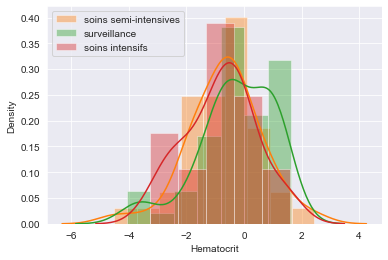

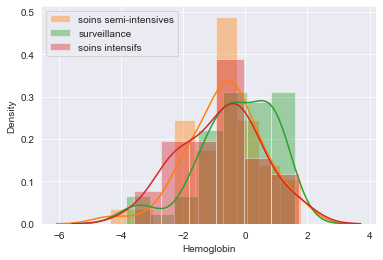

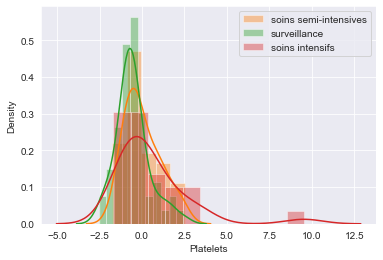

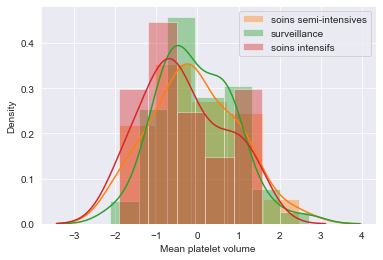

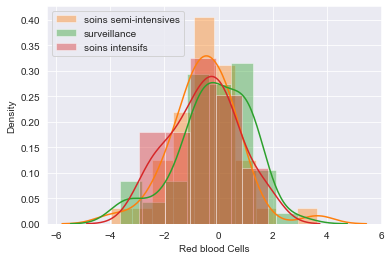

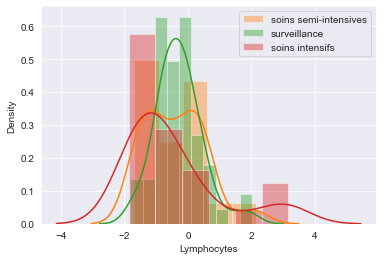

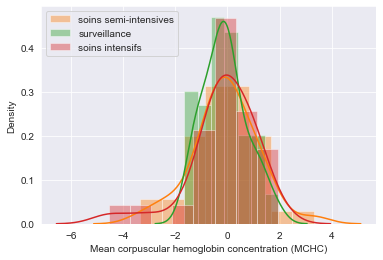

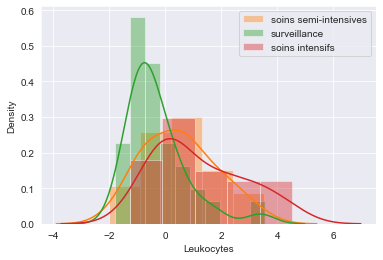

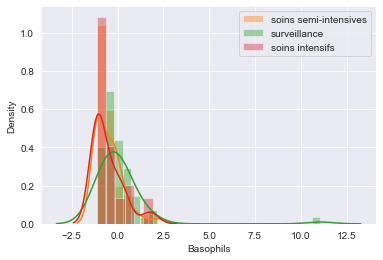

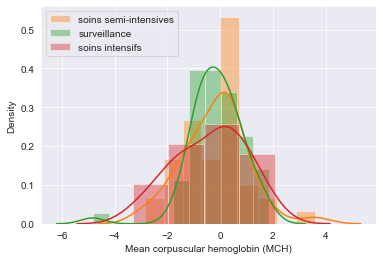

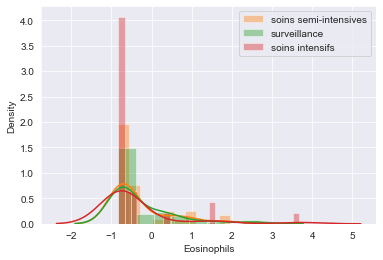

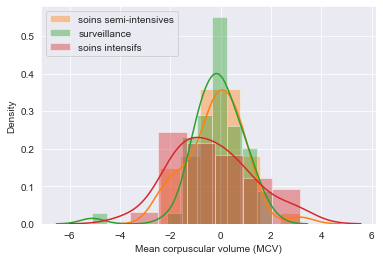

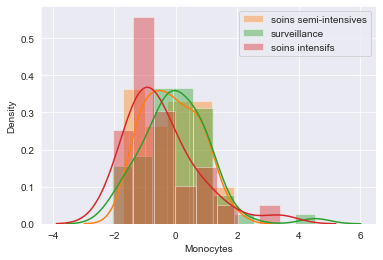

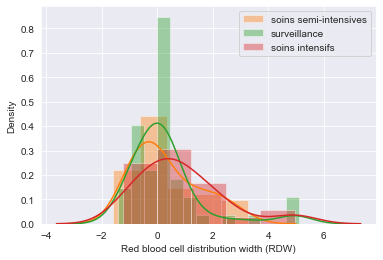

In [44]:
for col in blood_column:
    plt.figure()
    for cat in df['statut'].unique():
        sb.distplot(df[df['statut'] == cat][col], label=cat)
    plt.legend()

In [45]:
blood_column

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [46]:
df.dropna().count()

Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
Patient addmited to intensive care unit (1=yes, 0=no)    0
                                                        ..
Arteiral Fio2                                            0
Phosphor                                                 0
ctO2 (arterial blood gas analysis)                       0
est malade                                               0
statut                                                   0
Length: 112, dtype: int64

In [47]:
df[blood_column].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [48]:
df[viral_column].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [49]:
df1 = df[viral_column[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\rjja\AppData\Local\Temp\ipykernel_11536\958130210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] = df['SARS-Cov-2 exam result']


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [50]:
df2 = df[blood_column[:-2]]
df2['covid'] = df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)

C:\Users\rjja\AppData\Local\Temp\ipykernel_11536\1536725623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['covid'] = df['SARS-Cov-2 exam result']


negative    0.864775
positive    0.135225
Name: covid, dtype: float64

## Hypothèse: Les individus atteints du covid-19 ont de LeuKocytes, Monocytes, Platekets significativement différents

## Les Individus atteints d'une quelconques maladies on des taux significativement diffèrents

In [51]:
from scipy.stats import ttest_ind

In [52]:
positive_df.shape

(558, 110)

In [53]:
negative_df.shape

(5086, 110)

In [54]:
negative_df.sample(558)

Patient age quantile SARS-Cov-2 exam result  \
2232                    13               negative   
3405                     9               negative   
1104                     9               negative   
3291                    10               negative   
3790                    18               negative   
...                    ...                    ...   
2561                    13               negative   
4842                    13               negative   
2799                     2               negative   
3141                    18               negative   
868                      0               negative   

      Patient addmited to regular ward (1=yes, 0=no)  \
2232                                               0   
3405                                               0   
1104                                               0   
3291                                               0   
3790                                               0   
...                                              ...   
2561                                               0   
4842                                               0   
2799                                               0   
3141                                               0   
868                                                0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
2232                                                  0       
3405                                                  0       
1104                                                  0       
3291                                                  0       
3790                                                  0       
...                                                 ...       
2561                                                  0       
4842                                                  0       
2799                                                  0       
3141                                                  0       
868                                                   0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
2232                                                  0             NaN   
3405                                                  0             NaN   
1104                                                  0             NaN   
3291                                                  0             NaN   
3790                                                  0             NaN   
...                                                 ...             ...   
2561                                                  0             NaN   
4842                                                  0             NaN   
2799                                                  0             NaN   
3141                                                  0             NaN   
868                                                   0             NaN   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
2232         NaN        NaN                    NaN              NaN  ...   
3405         NaN        NaN                    NaN              NaN  ...   
1104         NaN        NaN                    NaN              NaN  ...   
3291         NaN        NaN                    NaN              NaN  ...   
3790         NaN        NaN                    NaN              NaN  ...   
...          ...        ...                    ...              ...  ...   
2561         NaN        NaN                    NaN              NaN  ...   
4842         NaN        NaN                    NaN              NaN  ...   
2799         NaN        NaN                    NaN              NaN  ...   
3141         NaN        NaN                    NaN              NaN  ...   
868          NaN        NaN                    NaN              NaN  ...   

      Hb saturation (arterial blood gases)  \
2232                                   NaN   
3405                             

In [55]:
balanced_neg = negative_df.sample(positive_df.shape[0])

In [56]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_neg[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 Rejectée'
    else:
        return 0

In [57]:
for col in blood_column:
    print(f'{col:-<50}{t_test(col)}')

Hematocrit----------------------------------------0
Hemoglobin----------------------------------------0
Platelets-----------------------------------------H0 Rejectée
Mean platelet volume -----------------------------H0 Rejectée
Red blood Cells-----------------------------------0
Lymphocytes---------------------------------------0
Mean corpuscular hemoglobin concentration (MCHC)--0
Leukocytes----------------------------------------H0 Rejectée
Basophils-----------------------------------------0
Mean corpuscular hemoglobin (MCH)-----------------0
Eosinophils---------------------------------------H0 Rejectée
Mean corpuscular volume (MCV)---------------------0
Monocytes-----------------------------------------0
Red blood cell distribution width (RDW)-----------0


## Préprocessing

In [58]:
dataf = data.copy()

In [59]:
missing_rate = dataf.isna().sum()/ df.shape[0]

In [60]:
blood_column = list(df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 112 but corresponding boolean dimension is 111